## **I. Introduction**

In this experiment, we are experimentally determining $g$ (gravitational acceleration). We use the following equation: 

$$
    T =
        2\pi 
        \sqrt{
            \frac
                {L}
                {g}
        }
$$

where,

- $T$ is the peroid (time for one full swing)
- $L$ is the length of the string
- $g$ is the gravitational acceleration

### **1) Objective**

To determine the acceleration due to gravity (g) by measuring the period of a simple pendulum at different string lengths and analyzing the relationship between $T^2$ and $L$.

### **2) Materials**

- A pendulum (a small mass attached to a string)
- A meter stick
- A stopwatch
- A clamp stand or fixed support
- A protractor (optional, for small-angle approximation)

### **3) Procedure**

**- Setup the Pendulum**

1. Attach the string to a fixed support so that the pendulum can swing freely.

2. Measure the initial length of the string ($L$), from the pivot point to the center of mass of the pendulum bob.


**- Measure the Period for Different Lengths:**

1. Pull the pendulum to an angle ($30^\circ$) to approximate simple harmonic motion.

2. Release the pendulum gently, without applying any push.

3. Start the stopwatch as the pendulum crosses a reference point.

4. Count 10 complete oscillations, stopping the stopwatch after the 10th swing.

5. Record the total time ($t_{10}$) and compute the period ($T$) using: $$ T = \frac{t_{10}}{10} $$

6. Repeat this process at least three times for each string length to calculate the average $T$.

**- Repeat for Different String Lengths:**

1. Shorten the string to the next desired length (e.g., 0.90 m, 0.80 m, etc.).

2. Repeat the timing procedure for each new string length.

## **II. Data Analysis**

### **1) Data Manipulation** 

In [27]:
import pandas as pd

# Importing CSV under data
data = pd.read_csv("./pendulum.csv")

**Data Table**

In [28]:
# Table 1.0 : Data Table
table_1 = data.iloc[:7]

print(table_1)

  L_1 (m)    t_10  t_10.1  t_10.2  t_10.3  t_10.4    t_avg      t_0     t_0^2
0     0.6   15.03   15.43   15.45   15.23   15.56  15.3400  1.53400  2.353156
1     0.7   15.65   15.89   15.70   16.57   16.91  16.1440  1.61440  2.606287
2     0.8  16.889   17.99   17.70   17.15   17.77  17.4998  1.74998  3.062430
3     0.9   18.99   19.01   18.78   18.86   19.11  18.9500  1.89500  3.591025
4       1   19.54   20.11   19.43   19.67   19.99  19.7480  1.97480  3.899835
5     1.1   21.03   21.13   20.93   20.85   20.78  20.9440  2.09440  4.386511
6     1.2   22.01   22.00   22.16   22.09   22.08  22.0680  2.20680  4.869966


**String Length by Periodicity Squared**

In [29]:
# Table 2.0 : String length vs. Periodicity Squared
table_2 = data[["L_1 (m)", "t_0^2"]][:7]

print(table_2)

  L_1 (m)     t_0^2
0     0.6  2.353156
1     0.7  2.606287
2     0.8  3.062430
3     0.9  3.591025
4       1  3.899835
5     1.1  4.386511
6     1.2  4.869966


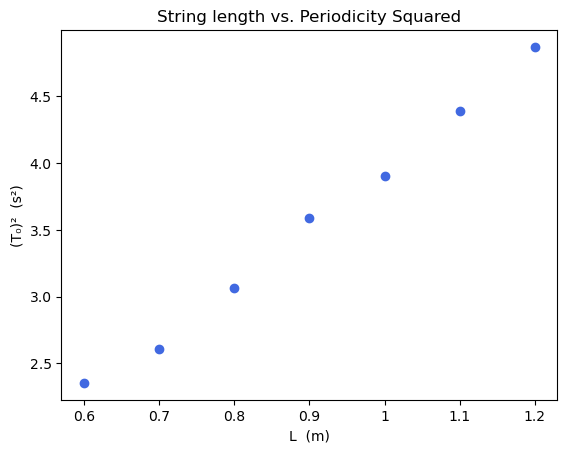

In [30]:
import matplotlib.pyplot as plt

# Plotting a scatter table with Table_2 with proper column names
plt.scatter(table_2.iloc[:, 0], 
         table_2.iloc[:, 1],
         marker="o",
         linestyle="-",
         color="royalblue")

# Adding labels and title
plt.xlabel('L  (m)')
plt.ylabel('(T₀)²  (s²)')
plt.title('String length vs. Periodicity Squared')

# Show the graph
plt.show()

### **2) Linear Regression**

We may use basic linear regression to find the _best-fitting_ line, which can be immediately done with the help of `np.polyfit(x, y, 1)`. 

In Excel, the same operation can be applied via: `=SLOPE(x-range, y-range)`.

#### **Defining our Trend line**

The general equation of a straight line is:

$$
    y = ax + b
$$

where,


- $y$ is the dependent variable (the one we are trying to predict or explain).  
 


- $x$ is the independent variable (the one we can control or measure). 


- $a$ is the slope of the line, which tells us how much $y$ changes when $x$ changes.  

- $b$ is the $y$-intercept, the value of $y$ when $x = 0$. 

#### **Context to our experiment**

We may shed light as what each variable represents in the context of our experiment.

Modifying our equation,

$$
    T =
        2\pi 
        \sqrt{
            \frac
                {L}
                {g}
        }

    \quad
    \rArr
    \quad

    {T_0}^2 = 
    \frac
        {4 \pi ^2}
        {g} 
    L
$$

This is in the form $y = mx + b$, where:

- $y = {T_0}^2$  

- $a = \frac{4\pi^2}{g}$ (the slope) 

- $x = L$    

- $b = 0$ (the $y$-intercept, which we expect to be $0$ because the pendulum should have zero period at zero length). 

In [31]:
import numpy as np
import pandas as pd

# Define x,y
x = table_2.iloc[:,0]
y = table_2.iloc[:,1]

# Convert columns to numeric
x = pd.to_numeric(x, errors="coerce")
y = pd.to_numeric(y, errors="coerce")

# slope (a) and intercept (b)
slope, intercept = np.polyfit(x,y,1)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 4.267244199999998
Intercept: -0.30206106571428193


Thus,

$$
    \boxed{
        a = 4.267 
    }
$$

$$
    \boxed{
        b = -0.302
    }
$$

#### **Graphing**

In [32]:
# Defining the trend_line

trend_line = slope * x + intercept

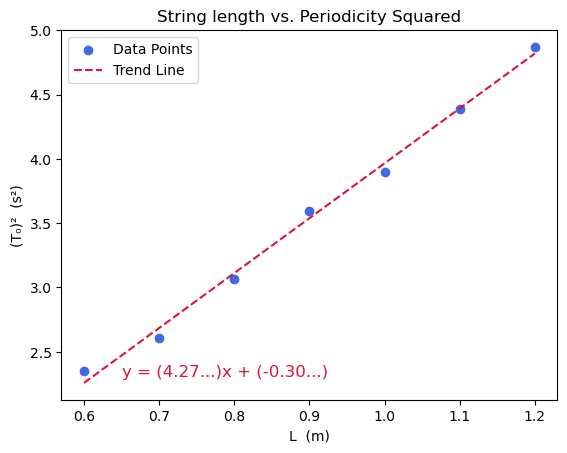

In [33]:
# Creating the scatter plot
plt.scatter(x, y, 
            color='royalblue',
            marker='o',
            label='Data Points')

# Plotting the line of best fit
plt.plot(x, trend_line,
         color="crimson",
         linestyle="--",
         label="Trend Line")

# Adding the equation of the line of best fit
equation = f"y = ({slope:.2f}...)x + ({intercept:.2f}...)"
plt.text(x.iloc[0] + 0.05, 
         trend_line.iloc[0] + 0.05,
         equation,
         fontsize=12,
         color="crimson")

# Adding labels and title
plt.xlabel('L  (m)')
plt.ylabel('(T₀)²  (s²)')
plt.title('String length vs. Periodicity Squared')

# Show the legend
plt.legend()

# Show the graph
plt.show()

#### **Coefficient of determination (R-squared) $R^2$**

> In statistics, the coefficient of determination measures how well a regression model fits the data. It represents, _the proportion of the variance in the dependent variable that is predictable from the independent variable(s)_.

***Interpretation***

- R² = 1: Perfect fit (the model explains all variability in the data).

- R² = 0: No fit (the model doesn't explain any variability in the data).


$$
    R^2 =
        1 
        - \frac
            {
                \sum{
                    \left( 
                        {y_\text{observed}}
                        - {y_\text{predicted}}
                    \right)^2
                }
            }
            {
                \sum{
                    \left( 
                        {y_\text{observed}}
                        - {\bar{y}}
                    \right)^2
                }
            }

$$

Where,



- $y_\text{observed}$ are actual values of the data

- $y_\text{predicted}$ are values predicted by the lines of best fit


- $\bar y$ is the mean of the observed data

We may calculate it manually as using NumPy's library. 

In Excel, you can use `=CORREL(X-range, Y-range)^2` or you can enable *show $R^2$* in the graphing options.

In [34]:
# numerator
residual_sum = np.sum(
    (y - trend_line)**2
)

# denominator
square_sum = np.sum(
    (y - np.mean(y))**2
)

# calculating R^2
r_squared = 1 - (residual_sum / square_sum)

print(f"R^2 = {r_squared}")

R^2 = 0.99466899273353


`square_sum` measures how far all the points are from the average value (mean). Think of it as asking "How spread out is all of my data"?


`residual_sum` measures how far each point is from the line of best fit. Think of it as asking "How far are my points from the line? There is error in my model."

Thus,

$$
    \boxed{
        R^2 = 99.467 \%
    }
$$

Since, $R^2 = 99.46 \%$, **our data has very little errors**, with very little variation in the data.



Meaning, model does an excellent job of predicting the data points, and there's only a very tiny amount of error or variance left unexplained. In the context of our experiment, our data is reliable for the next step of our procedure.

### **3) Standard error $\sigma_a$**

***Interpretation***

- **Small $a$** (near 0) : The estimated slope is precise and closely represents the true slope. The estimate is reliable.

- **Large $a$**
The estimated slope has more uncertainty and may not represent the true slope well. The estimate is less reliable.

- **Relative Size**
If $a$ is much smaller than the slope, the estimate is considered more accurate. If $a$ is large relative to the slope, the estimate is less reliable.


$$
    {\sigma_a} = 
        {a}
        \sqrt{
            \frac
                {1 - R^2}
                {R^2 (N-2)}
        }
$$

where,

- The standard error of the regression (or the slope estimate) 

    **$a = 4.267... \quad$**

- The coefficient of determination (which measures the goodness of fit) 

    **$R^2 = 0.994... \quad$**


- The sample size (number of data points) 

    **$N = 7$**



In [35]:
N = 7

# Calculating a_a
sigma_a = slope * np.sqrt((1 - r_squared) / (r_squared * (N - 2)))

print(f"sigma_a = {sigma_a}")

sigma_a = 0.13971011238675576


$$
    \sigma_a = 0.139...
$$

*Therefore, our slope closely represents the real slope.*

### **4) Standard error of the mean**

The standard error of the mean (SEM) is also referred to as aleatoric uncertainty in some contexts.

$$
    \Delta {a}_{ale} =
        \frac
            {\sigma_a}
            {\sqrt N} 
$$

where,

- This is the standard deviation of your measurements — it tells you how much the data points tend to deviate from the mean 

    $\sigma_a$ = 0.139

- The number of measurements or data points. 

    $N$ = 7


- This represents the uncertainty due to random variations in the measurements — also known as aleatoric (random) uncertainty.

    $\Delta {a}_{ale} $


In [36]:
# Calcluate a_ale 

ale_a = sigma_a / np.sqrt(N)
print(f"ale_a = {ale_a}")

ale_a = 0.052805459002320046


$$
    \Delta {a}_{ale} = 0.0528
$$

Thus, rnadom errors have a minimal effect on our measurements, indicating *high precision* in the data.

### **5) Uncertainty in $g$**

***Interpretation***

- **Small $\Delta g$**: Indicates that the uncertainty in $g$ (acceleration due to gravity) is very low, meaning the measurement of $g$ is highly precise.

- **Larger $\Delta g$**: Suggests more uncertainty in the measurement of $g$, meaning the data is less reliable or the measurements have a higher error margin.

- **Direct relationship with $\Delta a_{ale}$**: The value of $\Delta g$ is directly influenced by the uncertainty in $a$ (distance or length), so if $\Delta a_{ale}$ is small, $\Delta g$ will also be small, indicating better precision in the experiment.


$$
    \Delta g = 
        \left|
            \frac
                {\delta g}
                {\delta a}
            \Delta {a}_{aleatoir}
        \right|
$$

where,

$$
    \begin{align*}
        g = 
            \dfrac
                {4 \pi ^2}
                {a}
    \end{align*}

    \begin{align*}
        \quad
        \rArr
        \quad
    \end{align*}

    \begin{align*}
        \frac
            {\delta g}
            {\delta a} 
            &= 
                - \dfrac
                    {4 \pi^2}
                    {a^{2}}
    \end{align*}
$$

meaning,

$$
\begin{align*}
    \Delta g 
        &= 
            \left|
                \frac
                    {\delta g}
                    {\delta a}
                \Delta {a}_{ale}
            \right|
    \\ \\
        &= 
            \left|   -
                \frac
                    {4 \pi^2}
                    {a^{2}}
                \cdot
                \Delta {a}_{ale}
            \right|
\end{align*}
$$

In [37]:
# Calculate D_g
D_g = np.abs((-4 * np.pi**2) * (ale_a) / (slope**2))

print(f"D_g = {D_g}")

D_g = 0.11448367580452858


$$
    \Delta {g} = 0.114...
$$

### **6) Determine $g$**

Recall from our definition that,

$$
    a = 
        \frac
            {4\pi^2}
            {g}

    \quad
    \rArr
    \quad

    g = 
        \frac
            {4\pi^2}
            {a}
$$

where, $a = 4.267... \\$

In [38]:
import math

# Calculating for g
g = (4 * math.pi ** 2) / slope

print(f"g = {g}")

g = 9.251501848513252


Thus, from our experiment:

$$
    \boxed{
        g = 9.251... \quad m/s^2
    }
$$

This, of course, is not the exact values of the Earth's acceleration of gravity, which is:

$g = 9.80665 \quad m/s^2$


NIST. (n.d.). Standard gravity (gn). National Institute of Standards and Technology. Retrieved March 12, 2025, from https://physics.nist.gov/cgi-bin/cuu/Value?gn|search_for=gravity

### **7) Find the Accuracy and Precision**

$$
    \begin{align*}
        & \begin{cases}
            \text{Accuracy \%} =
                \dfrac
                    {
                        \left|
                            g - 9.81
                        \right|
                    }
                    {
                        9.81
                    }
                \times
                {100 \%}
            \\ \\ 
            \text{Precision \%} =
                \dfrac
                    {
                        \Delta g
                    }
                    {
                        g
                    }
                \times
                {100 \%}
        \end{cases}
    \end{align*}
$$

In [ ]:
# Calculating Accuracy
accuracy = np.abs(g - 9.81) / 9.81 

# Calculating Precision
precision = D_g / g 

print(f"accuracy = {accuracy}")
print(f"precision = {precision}")

accuracy = 0.056931513913022286
precision = 0.012374604434946581


: 

$$
        \begin{cases}
            \text{Accuracy \%} = 5.693 \%
                
            \\ \\ 

            \text{Precision \%} = 1.237 \%
        
        \end{cases}

$$

## **III. Conclusion**

In this experiment, the value of acceleration due to gravity ($g$) was determined using experimental data, yielding a result of $g = 9.251 \, \text{m/s}^2$. This value is notably different from the accepted value of $g = 9.81 \, \text{m/s}^2$, indicating some level of **inaccuracy** in the measurements. The calculated accuracy of 5.693% reflects the deviation from the theoretical value, which could be attributed to experimental errors or limitations in the measurement setup.

Despite this inaccuracy, the **precision** of the measurements is relatively high, with a precision value of 1.127%. This suggests that while the data may not be close to the true value of $g$, the repeated measurements are consistent with each other, indicating reliable measurement techniques in terms of variation.

In summary, the experiment demonstrated good precision but lower accuracy, suggesting that factors such as systematic errors or imperfections in the experimental method might have contributed to the observed discrepancy from the theoretical value of $g$. Further refinement of the experimental setup and additional measurements could improve the accuracy of the results.
